In [180]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
import os
import pickle
%matplotlib inline
from datetime import datetime
from dateutil.parser import parse

In [181]:
with open("all_clean_data.pkl", 'rb') as picklefile: 
    merge_housing = pickle.load(picklefile)
merge_housing.head()

,BedSize,Year,Month,Apartment_rent,Shift_Year,Shift_Month,Zillow_Housing_price,Search_Count_SeattleRent,Search_Count_SeattleHousing,Search_Count_seattleApartment,...,NewListingsYoy,NumberofRecords,PriceDrops,PriceDropsMom,PriceDropsYoy,SoldAboveList,SoldAboveListMom,SoldAboveListYoy,Date,target_Apartment_rent
4,Studio,2011,7,1000.0,2011,07,365300.0,36,25,22,...,-16.2,1.0,0.286394,0.082724,-0.006008,0.162996,-0.008754,0.059369,2011-07-01,1000.0
5,Studio,2011,8,1000.0,2011,08,367900.0,36,24,22,...,-11.2,1.0,0.289133,0.002739,0.019233,0.167315,0.004320,0.038875,2011-08-01,1000.0
6,Studio,2011,9,1075.0,2011,09,381900.0,38,28,22,...,-6.4,1.0,0.282218,-0.006915,-0.040034,0.255848,0.088533,0.130313,2011-09-01,1075.0
7,Studio,2011,10,995.0,2011,10,393600.0,38,29,28,...,-8.1,1.0,0.262083,-0.020135,-0.028809,0.270305,0.014457,0.104366,2011-10-01,995.0
8,Studio,2011,11,865.0,2011,11,400700.0,46,26,25,...,4.8,1.0,0.259186,-0.002897,-0.039458,0.292494,0.022190,0.136814,2011-11-01,865.0


In [182]:
studio_df = merge_housing.loc[merge_housing['BedSize'] == 'Studio']
oneBed_df = merge_housing.loc[merge_housing['BedSize'] == '1Bedroom']
twoBed_df = merge_housing.loc[merge_housing['BedSize'] == '2Bedroom']

In [183]:
# Build model for Studio

In [184]:
studio_df = studio_df.dropna().set_index('Date')
studio_df.head()


,BedSize,Year,Month,Apartment_rent,Shift_Year,Shift_Month,Zillow_Housing_price,Search_Count_SeattleRent,Search_Count_SeattleHousing,Search_Count_seattleApartment,...,NewListingsMom,NewListingsYoy,NumberofRecords,PriceDrops,PriceDropsMom,PriceDropsYoy,SoldAboveList,SoldAboveListMom,SoldAboveListYoy,target_Apartment_rent
Date,,,,,,,,,,,,,,,,,,,,,
2011-07-01,Studio,2011,7,1000.0,2011,07,365300.0,36,25,22,...,67.5,-16.2,1.0,0.286394,0.082724,-0.006008,0.162996,-0.008754,0.059369,1000.0
2011-08-01,Studio,2011,8,1000.0,2011,08,367900.0,36,24,22,...,20.3,-11.2,1.0,0.289133,0.002739,0.019233,0.167315,0.004320,0.038875,1000.0
2011-09-01,Studio,2011,9,1075.0,2011,09,381900.0,38,28,22,...,28.6,-6.4,1.0,0.282218,-0.006915,-0.040034,0.255848,0.088533,0.130313,1075.0
2011-10-01,Studio,2011,10,995.0,2011,10,393600.0,38,29,28,...,3.7,-8.1,1.0,0.262083,-0.020135,-0.028809,0.270305,0.014457,0.104366,995.0
2011-11-01,Studio,2011,11,865.0,2011,11,400700.0,46,26,25,...,3.9,4.8,1.0,0.259186,-0.002897,-0.039458,0.292494,0.022190,0.136814,865.0


In [185]:
studio_df['Year'].value_counts()

2016    12
2015    12
2014    12
2013    12
2012    12
2017     8
2011     6
Name: Year, dtype: int64

In [186]:
# Linear Regression

In [187]:
X = studio_df.loc[:,['Year', 'Month', 'Zillow_Housing_price'                    
                                         , 'SoldAboveListYoy'
                                         , 'PriceDropsMom'
                                         , 'Inventory']]

y = studio_df.iloc[:,-1:]
X['Intercept'] = [1.0]*X.shape[0]    #include the intercept

In [188]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)
X_train.shape, y_train.shape, y_test.shape

((51, 7), (51, 1), (23, 1))

In [189]:
y_test.tail()

,target_Apartment_rent
Date,
2017-04-01,1495.0
2017-05-01,1512.0
2017-06-01,1590.0
2017-07-01,1580.0
2017-08-01,1555.0


In [190]:
from sklearn.linear_model import LassoCV
data_pd=pd.DataFrame(columns=['alpha', 'rsquared', 'log_alpha'])
listy = [1e-9,1e-8,1e-7,1e-6,1e-5, 1e-4, 1e-3, 1e-2, 1e-1,1]
for num in listy:
    lcv = LassoCV(alphas = [num], cv=5, random_state = 40)
    lcv.fit(X_train, y_train)
    #Returns the coefficient of determination R^2 of the prediction.
    data_pd = data_pd.append({'alpha': num, 'rsquared':lcv.score(X_test,y_test), 'log_alpha': np.log(num)},ignore_index=True)
data_pd

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.6/lib/

,alpha,rsquared,log_alpha
0,1.000000e-09,-1.169793,-20.723266
1,1.000000e-08,-1.169793,-18.420681
2,1.000000e-07,-1.169794,-16.118096
3,1.000000e-06,-1.169804,-13.815511
4,1.000000e-05,-1.169899,-11.512925
5,1.000000e-04,-1.170853,-9.210340
6,1.000000e-03,-1.180411,-6.907755
7,1.000000e-02,-1.277975,-4.605170
8,1.000000e-01,-1.466802,-2.302585
9,1.000000e+00,-2.539592,0.000000


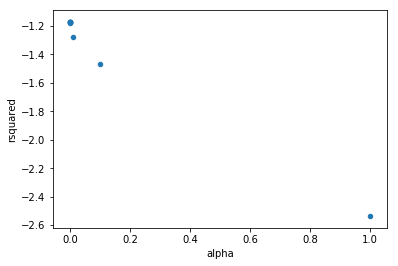

In [191]:
data_pd.plot(kind='scatter', x='alpha', y='rsquared')

In [192]:
fixed_y_test = y_test['target_Apartment_rent']
fixed_y_test_value = fixed_y_test.values
fixed_y_test_value

array([1400. , 1396. , 1428. , 1450. , 1425.5, 1495. , 1443. , 1495. ,
       1425. , 1430.5, 1450. , 1500. , 1400. , 1446.5, 1450. , 1495. ,
       1466. , 1495. , 1495. , 1512. , 1590. , 1580. , 1555. ])

In [193]:
listy = [1e-9,1e-8,1e-7,1e-6,1e-5, 1e-4, 1e-3, 1e-2, 1e-1,1]
LassoCVModel = LassoCV(alphas = listy, cv=5, random_state = 40)
LassoCVModel.fit(X_train, y_train)
y_predict = LassoCVModel.predict(X_test)
y_predict, y_test

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([1448.16907348, 1473.03519068, 1471.98672659, 1437.69665737,
        1458.49875675, 1454.85425441, 1486.27136935, 1502.31971011,
        1512.92418909, 1545.55900224, 1555.47237131, 1555.62301087,
        1560.81347773, 1578.56390216, 1584.51382028, 1547.53163711,
        1569.2919666 , 1557.5308634 , 1583.11140536, 1612.78041054,
        1612.64237865, 1632.69806524, 1651.33338291]),
             target_Apartment_rent
 Date                             
 2015-10-01                 1400.0
 2015-11-01                 1396.0
 2015-12-01                 1428.0
 2016-01-01                 1450.0
 2016-02-01                 1425.5
 2016-03-01                 1495.0
 2016-04-01                 1443.0
 2016-05-01                 1495.0
 2016-06-01                 1425.0
 2016-07-01                 1430.5
 2016-08-01                 1450.0
 2016-09-01                 1500.0
 2016-10-01                 1400.0
 2016-11-01                 1446.5
 2016-12-01                 1450.0
 2017-01-0

In [194]:
LassoCVModel.score(X_test, y_test)

-1.4668020668328383

In [161]:
# results = LassoCVModel
# r2_adj = 1 - ((sum((fixed_y_test_value-y_predict)**2.0)/(len(X_test) - len(results.score(X_test, y_test)) - 1))
#                 /(sum((fixed_y_test_value - np.mean(fixed_y_test_value))**2.0)/(len(X_test) - 1)))    
# #compute the adjusted r2 in the test set
# r2_adj

In [220]:
y_predict_series = y_test
y_predict_series['Predict_rent']=y_predict


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


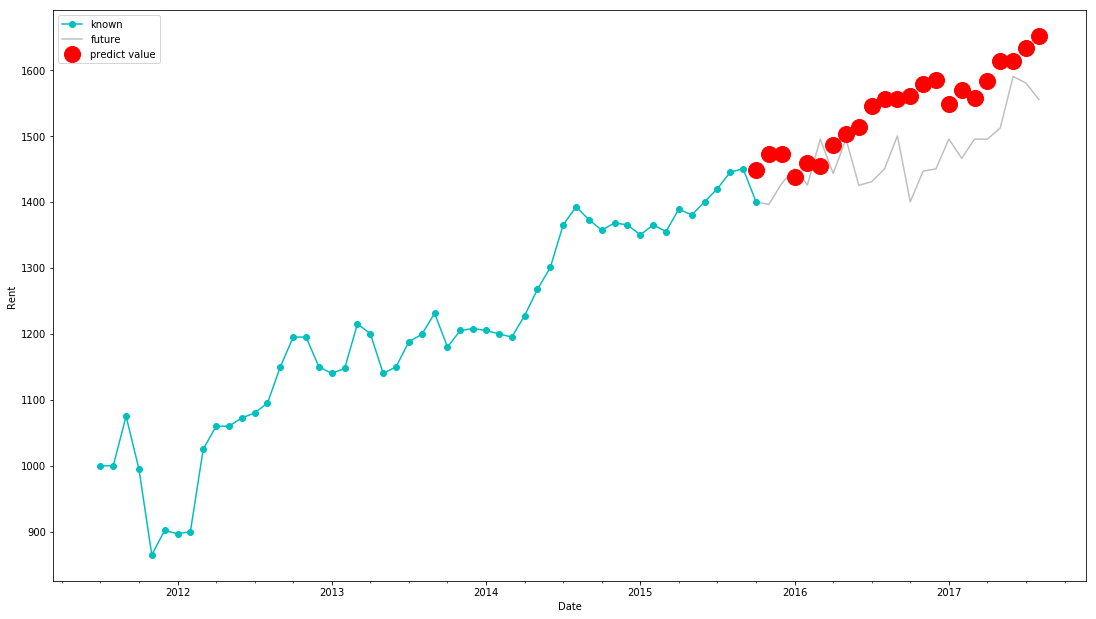

In [222]:
known = y_train['target_Apartment_rent'].append(y_predict_series['target_Apartment_rent'][0:1])
unknown = y_predict_series['target_Apartment_rent']
to_predict = y_predict_series['Predict_rent']

fig, ax = plt.subplots();
fig.set_size_inches(18.5, 10.5)
known.plot(ax=ax, c='c', marker='o', zorder=3);
unknown.plot(ax=ax, c='grey', alpha=0.5);
to_predict.plot(ax=ax, c='r', marker='o', markersize=16,
                linestyle='');

ax.legend(['known', 'future', 'predict value']);
ax.set_ylabel('Rent');

# PolynomialFeatures

In [107]:
from sklearn.preprocessing import PolynomialFeatures
#x_df_test = studio_df_droplowCorr.iloc[:,:-1]
x_df_test = studio_df.loc[:,['Year', 'Month', 'Zillow_Housing_price'                    
                                         , 'SoldAboveListYoy'
                                         , 'PriceDropsMom'
                                         , 'Inventory']]

y_df_test = studio_df.iloc[:,-1:]
x_df_test.columns


Index(['Year', 'Month', 'Zillow_Housing_price', 'SoldAboveListYoy',
       'PriceDropsMom', 'Inventory'],
      dtype='object')

In [108]:

x_df_test = x_df_test.dropna()
#y, X = patsy.dmatrices('Dep_Variable ~   ' + ' + '.join(X.columns), data=df, return_type="dataframe")
poly = PolynomialFeatures(1)
x_poly = poly.fit_transform(x_df_test)
X_transfer = pd.DataFrame(x_poly)
X_transfer.columns = poly.get_feature_names()
#len(X_transfer)
X_transfer.shape


(74, 7)

In [109]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_df_test, y, test_size=0.3, shuffle=False)
y_test.shape, y_test.shape

((23, 1), (23, 1))

In [110]:

# Create your model
model = sm.OLS(y_train,X_train)
fit = model.fit()
fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     target_Apartment_rent   R-squared:                       0.998
Model:                               OLS   Adj. R-squared:                  0.998
Method:                    Least Squares   F-statistic:                     4028.
Date:                   Wed, 25 Apr 2018   Prob (F-statistic):           1.03e-59
Time:                           15:46:20   Log-Likelihood:                -273.94
No. Observations:                     51   AIC:                             559.9
Df Residuals:                         45   BIC:                             571.5
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Year                     0.0363      0.107      0.339      0.736      -0.179       0.252
Month                    2.2344      2.525      0.885      0.381      -2.850       7.319
Zillow_Housing_price     0.0029      0.000      7.787      0.000       0.002       0.004
SoldAboveListYoy      -415.4613    131.668     -3.155      0.003    -680.653    -150.269
PriceDropsMom          296.0786    187.754      1.577      0.122     -82.078     674.235
Inventory               -0.0867      0.037     -2.345      0.024      -0.161      -0.012
==============================================================================
Omnibus:                        4.378   Durbin-Watson:                   0.777
Prob(Omnibus):                  0.112   Jarque-Bera (JB):                3.286
Skew:                          -0.560   Prob(JB):                        0.193
Kurtosis:                       3.542   Cond. No.                     1.06e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
y_pred = fit.predict(X_test)
k = np.sqrt(np.mean((y_test['target_Apartment_rent'] - y_pred)**2))
k, np.exp(k)

(322.3127028754155, 9.519810558072361e+139)

In [112]:
results = fit
r2_adj = 1 - ((sum((y_test['target_Apartment_rent']-results.predict(X_test))**2.0)/(len(X_test) - len(results.params) - 1))
                /(sum((y_test['target_Apartment_rent'] - np.mean(y_test['target_Apartment_rent']))**2.0)/(len(X_test) - 1)))    
#compute the adjusted r2 in the test set
r2_adj

-49.849411334875214

In [115]:
from matplotlib import pyplot
from pandas.tools.plotting import autocorrelation_plot
#autocorrelation_plot(studio_df)
pyplot.show()